In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
color = sns.color_palette()
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import plotly.offline as pyo
pyo.init_notebook_mode()
from plotly.subplots import make_subplots


In [2]:
df=pd.read_csv('datasets_42363_72602_general_data (2).csv')

In [3]:
df.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   NumCompaniesWorked Over18 PercentSalaryHike  StandardHours  \
0                 1.0      Y                11              8   
1                 0.0      Y                23              8   
2                 1.0      Y                15              8   
3                 3.0      Y                11              8   
4                 4.0      Y                12              8   

   StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                 0               1.0                      6               1   
1                 1               6.0                      3               5   
2                 3               5.0                      2               5   
3                 3              13.0                      5               8   
4                 2               9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     0  
1                        1                     4  
2                        0                     3  
3                        7                     5  
4                        0                     4  

[5 rows x 24 columns]

In [4]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total   Percent
NumCompaniesWorked          19  0.430839
TotalWorkingYears            9  0.204082
YearsWithCurrManager         0  0.000000
JobLevel                     0  0.000000
Attrition                    0  0.000000
BusinessTravel               0  0.000000
Department                   0  0.000000
DistanceFromHome             0  0.000000
Education                    0  0.000000
EducationField               0  0.000000
EmployeeCount                0  0.000000
EmployeeID                   0  0.000000
Gender                       0  0.000000
JobRole                      0  0.000000
YearsSinceLastPromotion      0  0.000000
MaritalStatus                0  0.000000
MonthlyIncome                0  0.000000
Over18                       0  0.000000
PercentSalaryHike            0  0.000000
StandardHours                0  0.000000
StockOptionLevel             0  0.000000
TrainingTimesLastYear        0  0.000000
YearsAtCompany               0  0.000000
Age                          0  0.000000

In [5]:
df.describe()

Age  DistanceFromHome    Education  EmployeeCount   EmployeeID  \
count  4410.000000       4410.000000  4410.000000         4410.0  4410.000000   
mean     36.923810          9.192517     2.912925            1.0  2205.500000   
std       9.133301          8.105026     1.023933            0.0  1273.201673   
min      18.000000          1.000000     1.000000            1.0     1.000000   
25%      30.000000          2.000000     2.000000            1.0  1103.250000   
50%      36.000000          7.000000     3.000000            1.0  2205.500000   
75%      43.000000         14.000000     4.000000            1.0  3307.750000   
max      60.000000         29.000000     5.000000            1.0  4410.000000   

          JobLevel  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
count  4410.000000    4410.000000         4391.000000        4410.000000   
mean      2.063946   65029.312925            2.694830          15.209524   
std       1.106689   47068.888559            2.498887           3.659108   
min       1.000000   10090.000000            0.000000          11.000000   
25%       1.000000   29110.000000            1.000000          12.000000   
50%       2.000000   49190.000000            2.000000          14.000000   
75%       3.000000   83800.000000            4.000000          18.000000   
max       5.000000  199990.000000            9.000000          25.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         4410.0       4410.000000        4401.000000   
mean             8.0          0.793878          11.279936   
std              0.0          0.851883           7.782222   
min              8.0          0.000000           0.000000   
25%              8.0          0.000000           6.000000   
50%              8.0          1.000000          10.000000   
75%              8.0          1.000000          15.000000   
max              8.0          3.000000          40.000000   

       TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
count            4410.000000     4410.000000              4410.000000   
mean                2.799320        7.008163                 2.187755   
std                 1.288978        6.125135                 3.221699   
min                 0.000000        0.000000                 0.000000   
25%                 2.000000        3.000000                 0.000000   
50%                 3.000000        5.000000                 1.000000   
75%                 3.000000        9.000000                 3.000000   
max                 6.000000       40.000000                15.000000   

       YearsWithCurrManager  
count           4410.000000  
mean               4.123129  
std                3.567327  
min                0.000000  
25%                2.000000  
50%                3.000000  
75%                7.000000  
max               17.000000

In [6]:
df.dropna()

Age Attrition     BusinessTravel              Department  \
0      51        No      Travel_Rarely                   Sales   
1      31       Yes  Travel_Frequently  Research & Development   
2      32        No  Travel_Frequently  Research & Development   
3      38        No         Non-Travel  Research & Development   
4      32        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
4404   29        No      Travel_Rarely                   Sales   
4405   42        No      Travel_Rarely  Research & Development   
4406   29        No      Travel_Rarely  Research & Development   
4407   25        No      Travel_Rarely  Research & Development   
4408   42        No      Travel_Rarely                   Sales   

      DistanceFromHome  Education EducationField  EmployeeCount  EmployeeID  \
0                    6          2  Life Sciences              1           1   
1                   10          1  Life Sciences              1           2   
2                   17          4          Other              1           3   
3                    2          5  Life Sciences              1           4   
4                   10          1        Medical              1           5   
...                ...        ...            ...            ...         ...   
4404                 4          3          Other              1        4405   
4405                 5          4        Medical              1        4406   
4406                 2          4        Medical              1        4407   
4407                25          2  Life Sciences              1        4408   
4408                18          2        Medical              1        4409   

      Gender  ...  NumCompaniesWorked Over18 PercentSalaryHike  StandardHours  \
0     Female  ...                 1.0      Y                11              8   
1     Female  ...                 0.0      Y                23              8   
2       Male  ...                 1.0      Y                15              8   
3       Male  ...                 3.0      Y                11              8   
4       Male  ...                 4.0      Y                12              8   
...      ...  ...                 ...    ...               ...            ...   
4404  Female  ...                 1.0      Y                18              8   
4405  Female  ...                 3.0      Y                17              8   
4406    Male  ...                 2.0      Y                15              8   
4407    Male  ...                 0.0      Y                20              8   
4408    Male  ...                 0.0      Y                14              8   

      StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
0                    0               1.0                      6   
1                    1               6.0                      3   
2                    3               5.0                      2   
3                    3              13.0                      5   
4                    2               9.0                      2   
...                ...               ...                    ...   
4404                 0               6.0                      2   
4405                 1              10.0                      5   
4406                 0              10.0                      2   
4407                 0               5.0                      4   
4408                 1              10.0                      2   

      YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager  
0                  1                        0                     0  
1                  5                        1                     4  
2                  5                        0                     3  
3                  8                        7                     5  
4                  6                        0                     4  
...              ...                      ...                   ..

In [7]:
df.columns 

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [8]:
df.drop(['EmployeeCount','EmployeeID'],axis=1,inplace=True)

In [9]:
print("percentage of employees who left:",(len(df[df['Attrition']=='Yes'])/len(df))*100,"%")
print("percentage of employess who stayed:",(len(df[df['Attrition']=='No'])/len(df))*100,"%")

percentage of employees who left: 16.122448979591837 %
percentage of employess who stayed: 83.87755102040816 %


In [11]:
newdf = df[['Age','Attrition', 'Gender', 'JobLevel', 'JobRole',
       'MonthlyIncome',
       'PercentSalaryHike', 'TotalWorkingYears',
       'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]

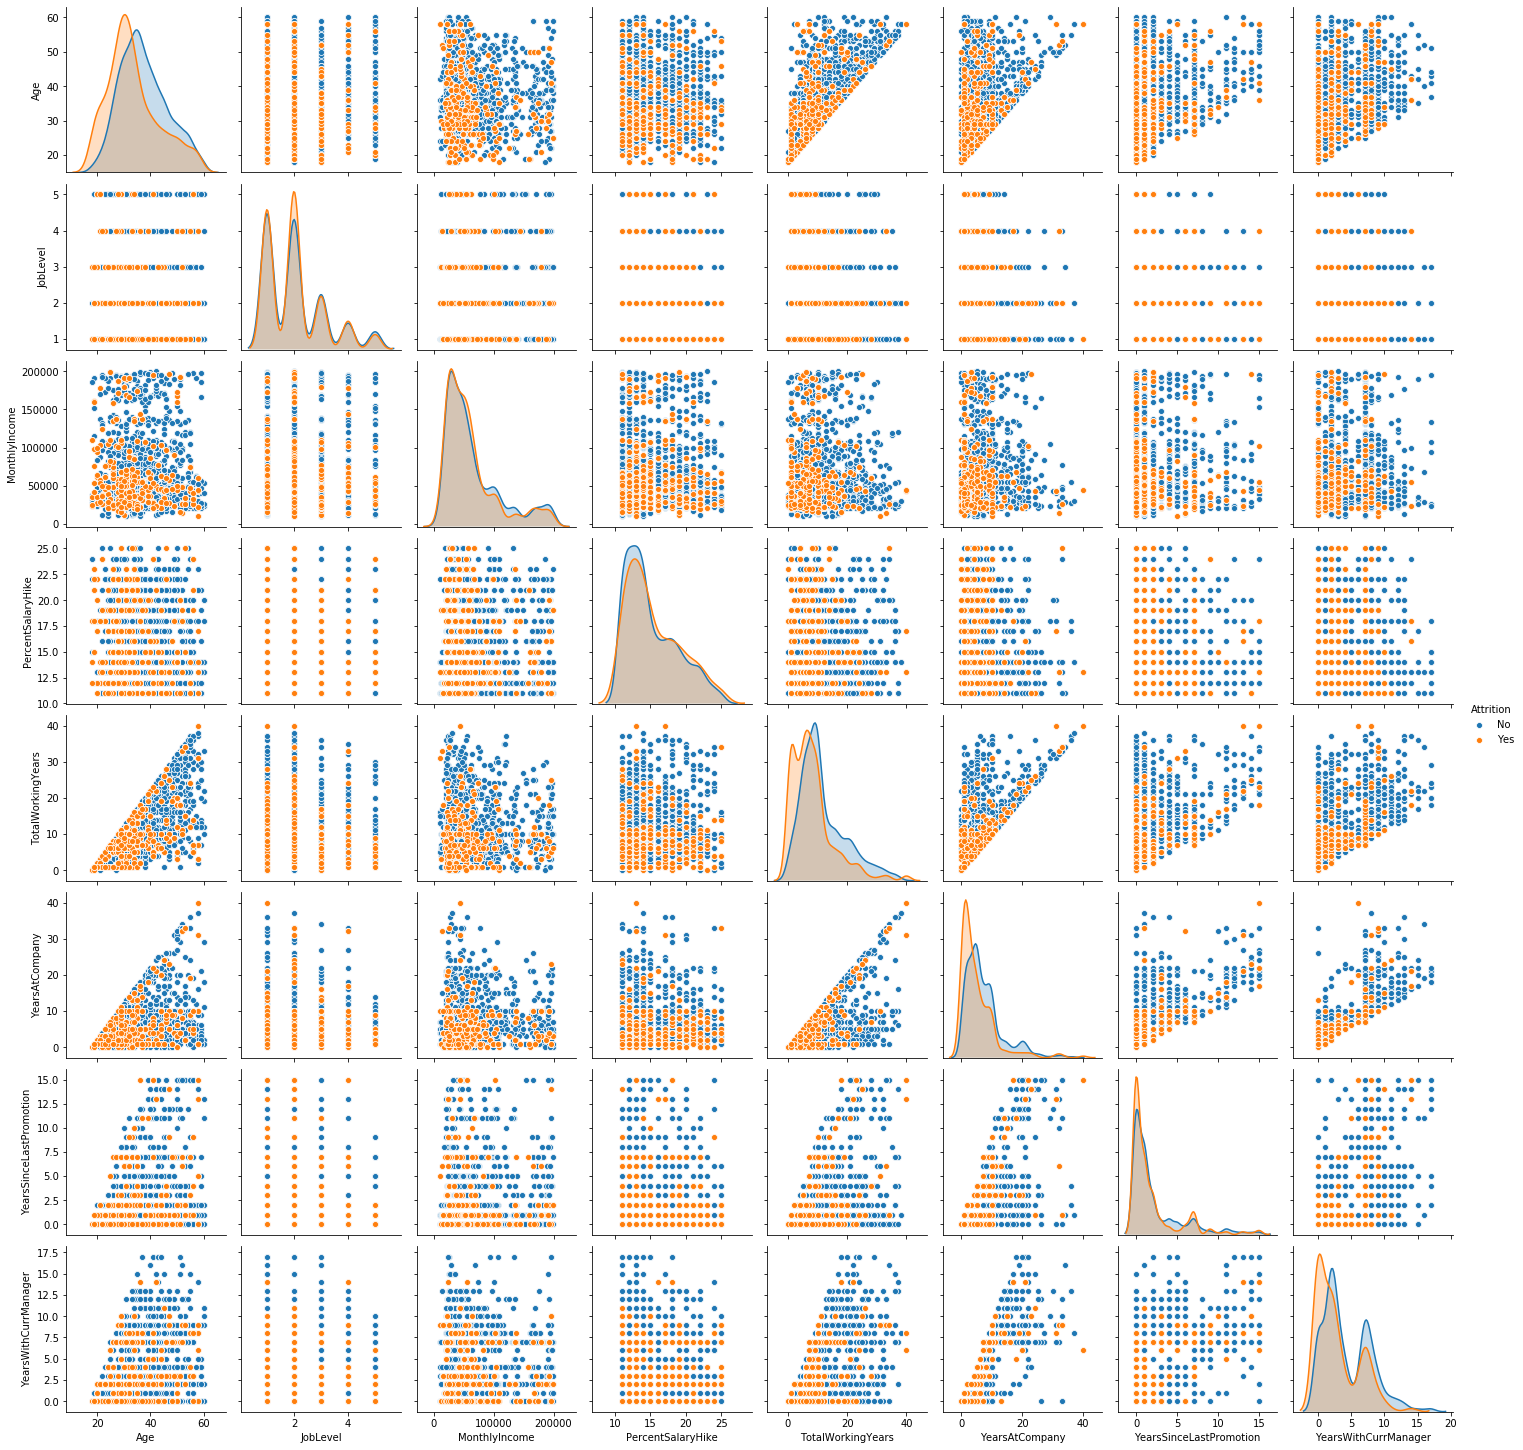

In [12]:
sns.pairplot(newdf,hue='Attrition')

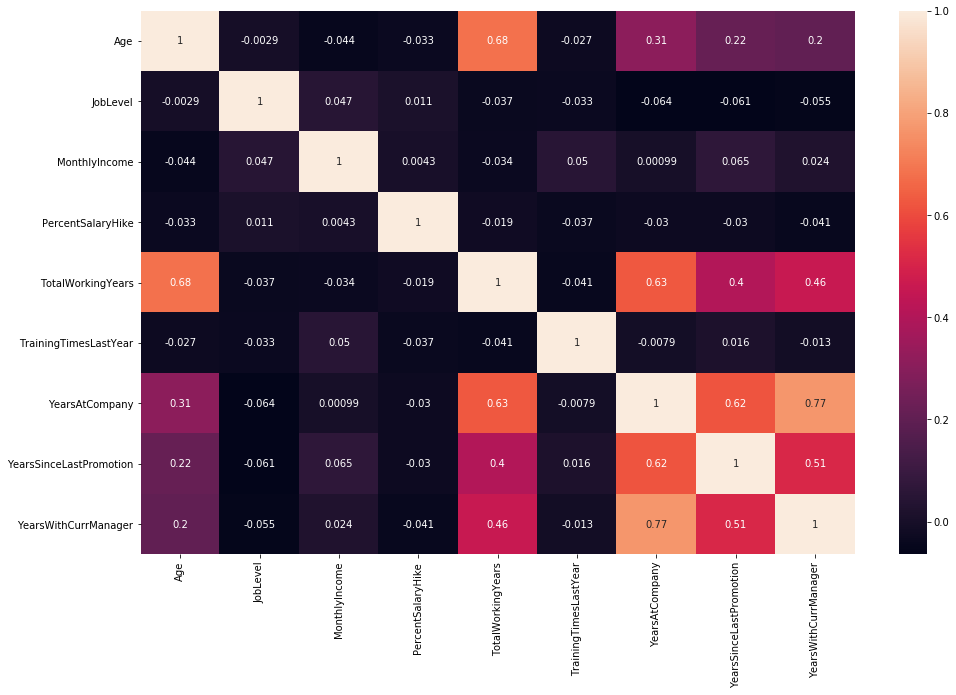

In [13]:
corr_cols = df[['Age','Attrition','BusinessTravel', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome',
       'PercentSalaryHike',  'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
corr = corr_cols.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True)
plt.show()

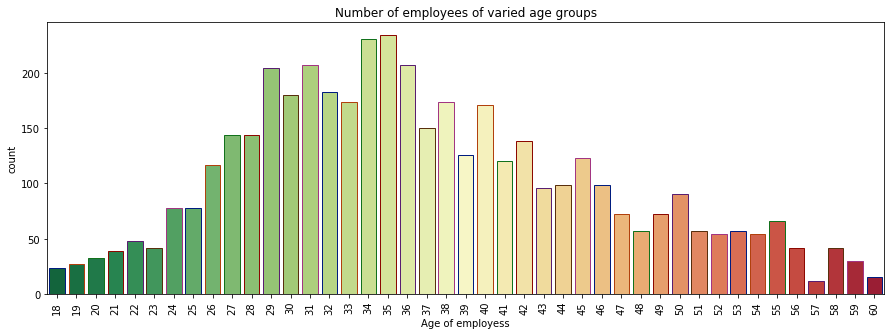

In [18]:
plt.subplots(figsize=(15,5))
sns.countplot('Age',data=newdf,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel('Age of employess')
plt.title('Number of employees of varied age groups')
plt.show()

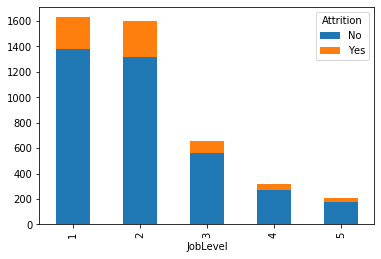

In [28]:
df.groupby(['JobLevel','Attrition']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [20]:
plt.subplots(figsize=(15,5))
sns.countplot('JobLevel',data=newdf,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.show()

In [27]:
df.groupby(['YearsWithCurrManager','Attrition']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

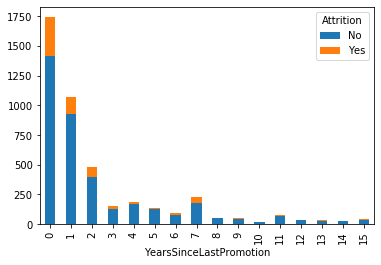

In [29]:
df.groupby(['YearsSinceLastPromotion','Attrition']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

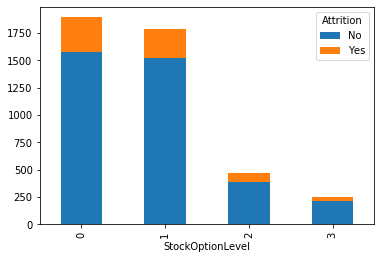

In [30]:
df.groupby(['StockOptionLevel','Attrition']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

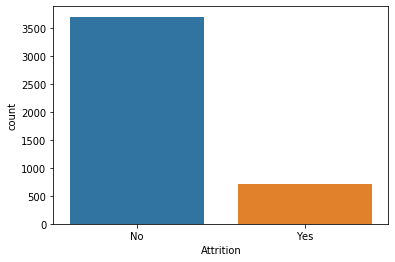

In [12]:
sns.countplot(x = "Attrition",data=df)
plt.show()

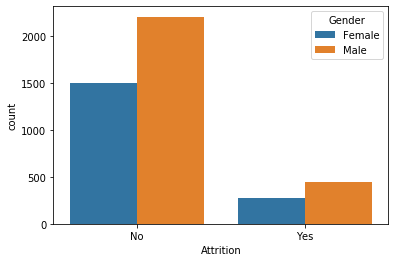

In [13]:
sns.countplot(x = "Attrition",data=df,hue="Gender")
plt.show()

In [14]:
df['MonthlyIncome'].value_counts()
print(df['MonthlyIncome'].min())
print(df['MonthlyIncome'].max())

10090
199990


In [23]:
#function to creat group of incomes, this helps because we have 1349 differente values here
def MonthlyIncome(dataframe):
    dataframe.loc[dataframe['MonthlyIncome'] <=10000,'MonthlyIncome'] = 1
    dataframe.loc[(dataframe['MonthlyIncome'] > 10000) & (dataframe['MonthlyIncome'] <= 30000), 'MonthlyIncome'] = 2
    dataframe.loc[(dataframe['MonthlyIncome'] > 30000) & (dataframe['MonthlyIncome'] <= 50000), 'MonthlyIncome'] = 3
    dataframe.loc[(dataframe['MonthlyIncome'] > 50000) & (dataframe['MonthlyIncome'] <= 70000), 'MonthlyIncome'] = 4
    dataframe.loc[(dataframe['MonthlyIncome'] > 70000) & (dataframe['MonthlyIncome'] <= 90000), 'MonthlyIncome'] = 5
    dataframe.loc[(dataframe['MonthlyIncome'] > 90000) & (dataframe['MonthlyIncome'] <= 110000), 'MonthlyIncome'] = 6
    dataframe.loc[(dataframe['MonthlyIncome'] > 110000) & (dataframe['MonthlyIncome'] <= 130000), 'MonthlyIncome'] = 7
    dataframe.loc[(dataframe['MonthlyIncome'] > 130000) & (dataframe['MonthlyIncome'] <= 150000), 'MonthlyIncome'] = 8
    dataframe.loc[(dataframe['MonthlyIncome'] > 150000) & (dataframe['MonthlyIncome'] <= 170000), 'MonthlyIncome'] = 9
    dataframe.loc[(dataframe['MonthlyIncome'] > 170000) & (dataframe['MonthlyIncome'] <= 190000), 'MonthlyIncome'] = 10
    dataframe.loc[(dataframe['MonthlyIncome'] > 190000) & (dataframe['MonthlyIncome'] <= 200000), 'MonthlyIncome'] = 11
    return dataframe

MonthlyIncome(df);

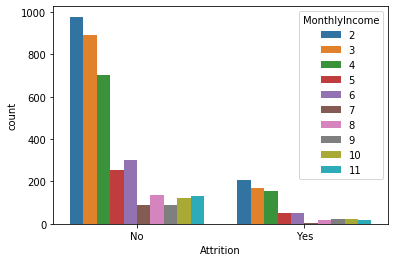

In [24]:
sns.countplot(x = "Attrition",data=df,hue="MonthlyIncome")
plt.show()

Even those with the lowest salaries do not have the lowest attrition rates. Which means income is not a major reason in why people leave 

In [25]:
df.groupby(['Attrition','MonthlyIncome']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [17]:
def Age(dataframe):
    dataframe.loc[dataframe['Age'] <= 30,'Age'] = 1
    dataframe.loc[(dataframe['Age'] > 30) & (dataframe['Age'] <= 40), 'Age'] = 2
    dataframe.loc[(dataframe['Age'] > 40) & (dataframe['Age'] <= 50), 'Age'] = 3
    dataframe.loc[(dataframe['Age'] > 50) & (dataframe['Age'] <= 60), 'Age'] = 4
    return dataframe

Age(df);

In [18]:
sns.countplot(x = "Attrition",data=df,hue="Age")
plt.show()

In [20]:
sns.barplot(x="JobLevel", y="Attrition",data=df,palette='Set1')

In [21]:
def movecol(df, cols_to_move=[], ref_col='', place='After'):
    
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(df[seg1 + seg2 + seg3])
df = movecol(df, 
             cols_to_move=['Attrition'], 
             ref_col='YearsWithCurrManager',
             place='After')

In [42]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 21].values

In [62]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X)
X = imputer.transform(X)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.



In [63]:
#Encoding Data 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer([('encoder',OneHotEncoder(),[1,2,5,6,8,9,12])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning:

The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.



In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [77]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm_random = confusion_matrix(y_test, y_pred)

print(accuracy_score(y_test,y_pred))
print(cm_random)

0.9891205802357208
[[932   0]
 [ 12 159]]
